# Βιβλιοθήκες

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Εισαγωγή και επισκόπηση εικόνων

In [2]:
import pathlib
data_dir = "/kaggle/input/eestech-challenge-task-2/train/train"
data_dir = pathlib.Path(data_dir)

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1765


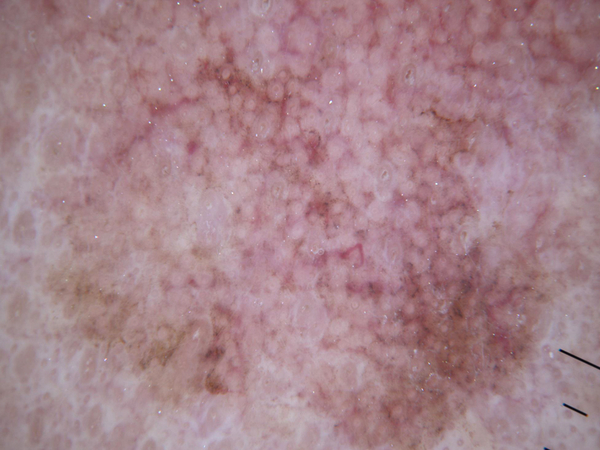

In [4]:
actinic_keratosis = list(data_dir.glob('actinic keratosis/*'))
PIL.Image.open(str(actinic_keratosis[0]))

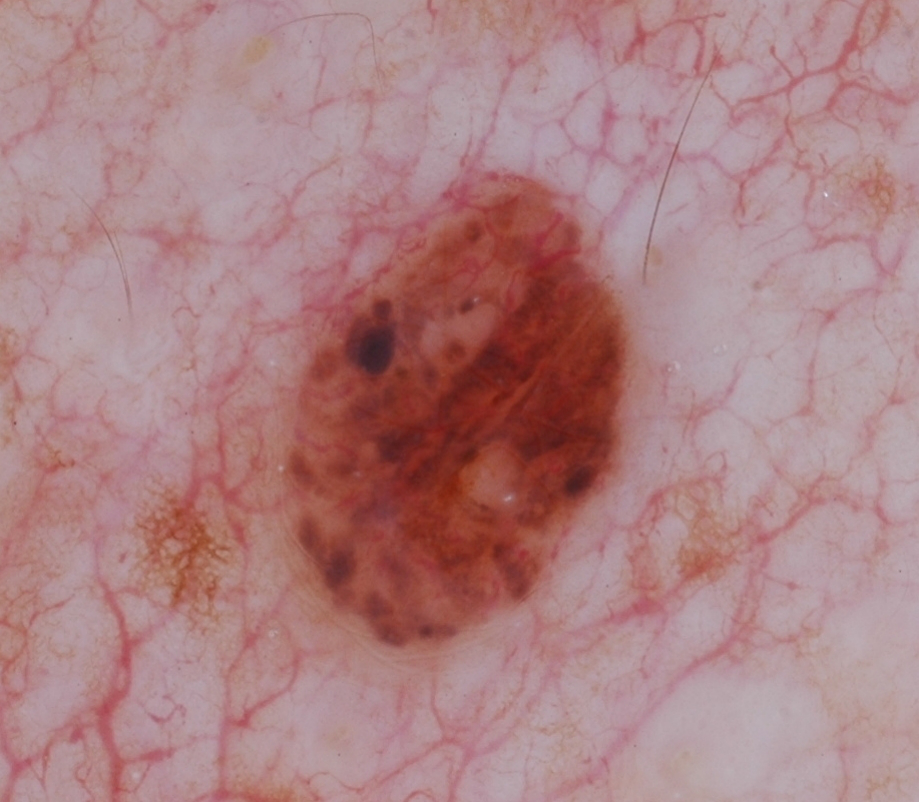

In [5]:
nevus = list(data_dir.glob('nevus/*'))
PIL.Image.open(str(nevus[0]))

# Εκπαίδευση νευρωνικού

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1765 files belonging to 9 classes.
Using 1412 files for training.


2022-04-09 16:09:37.159950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 16:09:37.237338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 16:09:37.238066: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 16:09:37.240241: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1765 files belonging to 9 classes.
Using 353 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


2022-04-09 16:09:40.014870: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


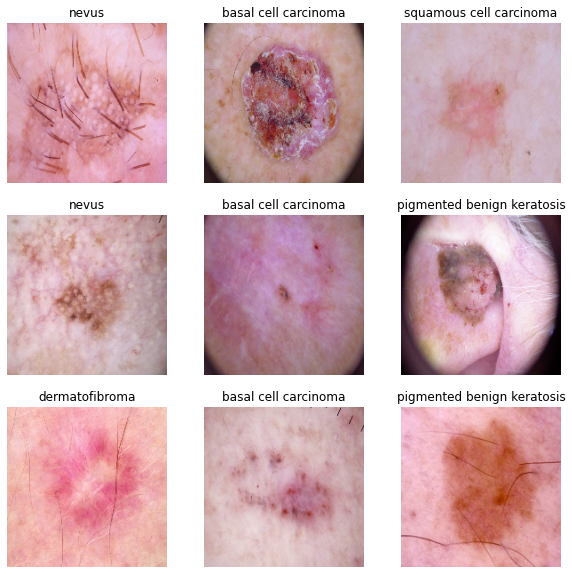

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2022-04-09 16:09:57.946990: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 27 of 1000
2022-04-09 16:10:00.498543: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.
2022-04-09 16:10:01.192458: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


45/45 [==============================] - 24s 115ms/step - loss: 1.9784 - accuracy: 0.2911 - val_loss: 1.8498 - val_accuracy: 0.3201
Epoch 2/10
45/45 [==============================] - 1s 14ms/step - loss: 1.6690 - accuracy: 0.3924 - val_loss: 1.6152 - val_accuracy: 0.4306
Epoch 3/10
45/45 [==============================] - 1s 14ms/step - loss: 1.5689 - accuracy: 0.4278 - val_loss: 1.5632 - val_accuracy: 0.4561
Epoch 4/10
45/45 [==============================] - 1s 14ms/step - loss: 1.4733 - accuracy: 0.4667 - val_loss: 1.4709 - val_accuracy: 0.4958
Epoch 5/10
45/45 [==============================] - 1s 14ms/step - loss: 1.3706 - accuracy: 0.5113 - val_loss: 1.5017 - val_accuracy: 0.5212
Epoch 6/10
45/45 [==============================] - 1s 14ms/step - loss: 1.2715 - accuracy: 0.5446 - val_loss: 1.4052 - val_accuracy: 0.5184
Epoch 7/10
45/45 [==============================] - 1s 14ms/step - loss: 1.2654 - accuracy: 0.5574 - val_loss: 1.4575 - val_accuracy: 0.5212
Epoch 8/10
45/45 [====

## Visualization της εκπαίδευσης

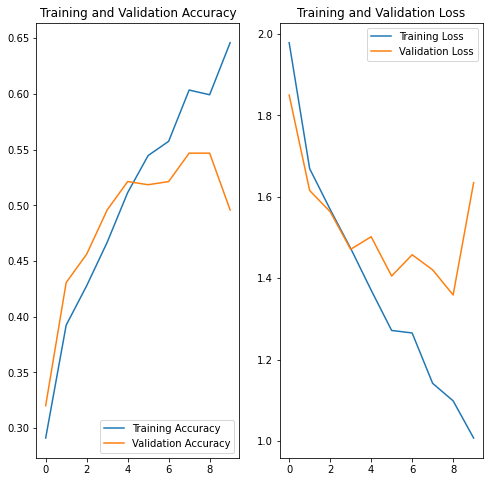

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Πρόβλεψη

In [17]:
test_dir="/kaggle/input/eestech-challenge-task-2/test/test"
test_dir = pathlib.Path(test_dir)
test_images = list(test_dir.glob('*.jpg'))

In [18]:
def predict(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    return np.argmax(score)

In [19]:
predictions = list(map(predict, test_images))

In [20]:
def get_images(path):
    f = str(path).rsplit('/', 1)
    return f[1]
    
img_filenames = list(map(get_images, list(test_images)))

In [21]:
preds = list(zip(img_filenames,predictions))
submission_df = pd.DataFrame(preds, columns=['image','class'])
submission_df.to_csv('submission.csv', index=False)